In [1]:
#Primer grafa s SDCTD številom
g = Graph([(0,1),(2,3)])
h = g.complement()  

#Primer grafa brez SDCTD števila
m = Graph([(0,1),(1,2),(1,3)])

In [2]:
#Osnivni CLP program, dejansko je malce napačen, glej naslednji dve kodi
p = MixedIntegerLinearProgram(maximization = False)
x = p.new_variable(binary = True)
p.set_objective(sum([x[v] for v in g]))

for v in g.vertices():
    p.add_constraint(sum((x[w] + x[v]) for w in g.neighbors(v)) >= 1) 

zaustavi = False
    
for v in g.vertices():
    neighbors_complement = h.neighbors(v)  
    if neighbors_complement:  
        p.add_constraint(sum(x[w] for w in neighbors_complement) >= 1)
        
    else:
        print("Slaba, graf nima SDCTD dominacije")  
        zaustavi = True
        break 
        
if not zaustavi == True:
    p.solve()
    x = p.get_values(x)
    print([v for v, i in x.items() if i == 1])  

[0, 2]


In [4]:
#Dominacijska množica
def SDCTD_mnozica(g):
    h = g.complement()

    p = MixedIntegerLinearProgram(maximization = False)
    x = p.new_variable(binary = True)
    p.set_objective(sum([x[v] for v in g]))

    for v in g.vertices():
        neighbors = g.neighbors(v)  
        if neighbors:
            p.add_constraint(sum((x[w] + x[v]) for w in neighbors) >= 1)
        else:
            p.add_constraint(x[v] == 1)
            
    zaustavi = False

    for v in g.vertices():
        neighbors_complement = h.neighbors(v)  
        if neighbors_complement:  
            p.add_constraint(sum(x[w] for w in neighbors_complement) >= 1)

        else:
            print("Slaba, graf nima SDCTD dominacije")  
            zaustavi = True
            break 

    if not zaustavi == True:
        p.solve()
        x = p.get_values(x)
        return([v for v, i in x.items() if i == 1]) 
    else:
        return None

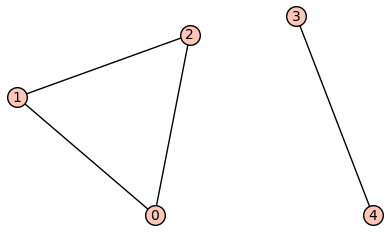

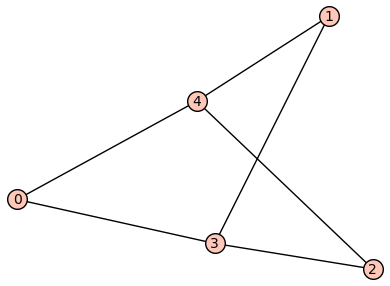

[0, 3]

In [5]:
G = Graph({0: [1, 2], 1: [0, 2], 2: [0, 1], 3: [4], 4: [3]})
H = Graph({0: [1, 2, 3], 1: [0, 2, 3], 2: [0, 1, 3], 3: [0, 1, 2]})
G.show()
M = G.complement()
M.show()


SDCTD_mnozica(G)

In [1]:
#SDCTD število
def SDCTD_stevilo(g):
    h = g.complement()

    p = MixedIntegerLinearProgram(maximization = False)
    x = p.new_variable(binary = True)
    p.set_objective(sum([x[v] for v in g]))

    for v in g.vertices():
        neighbors = g.neighbors(v)  
        if neighbors:
            p.add_constraint(sum((x[w] + x[v]) for w in neighbors) >= 1)
        else:
            p.add_constraint(x[v] == 1)
            
    zaustavi = False

    for v in g.vertices():
        neighbors_complement = h.neighbors(v)  
        if neighbors_complement:  
            p.add_constraint(sum(x[w] for w in neighbors_complement) >= 1)

        else:
            print("Slaba, graf nima SDCTD dominacije")  
            zaustavi = True
            break 

    if not zaustavi == True:
        p.solve()
        x = p.get_values(x)
        return(sum(1 for i in x.values() if i == 1))
    else:
        return None
 

In [1]:
#SDCTD število 2, le rahlo prilagodimo, da max_st ne meče print(...)
def SDCTD_stevilo2(g):
    h = g.complement()

    p = MixedIntegerLinearProgram(maximization = False)
    x = p.new_variable(binary = True)
    p.set_objective(sum([x[v] for v in g]))

    for v in g.vertices():
        neighbors = g.neighbors(v)  
        if neighbors:
            p.add_constraint(sum((x[w] + x[v]) for w in neighbors) >= 1)
        else:
            p.add_constraint(x[v] == 1)
            
    zaustavi = False

    for v in g.vertices():
        neighbors_complement = h.neighbors(v)  
        if neighbors_complement:  
            p.add_constraint(sum(x[w] for w in neighbors_complement) >= 1)

        else: 
            zaustavi = True
            break 

    if not zaustavi == True:
        p.solve()
        x = p.get_values(x)
        return(sum(1 for i in x.values() if i == 1))
    else:
        return None

In [8]:
def max_st(n):
    i = n
    vsi_grafi = [G for G in graphs.nauty_geng(f"{i} -c")]
    
    seznam = [] #seznam s SDCTD števili
    ustrezni_grafi = []  # seznam z grafi

    for g in vsi_grafi:
        stevilo = SDCTD_stevilo2(g)
        
        if stevilo is not None:
            seznam.append(stevilo)
            ustrezni_grafi.append(g)
    
    if not ustrezni_grafi:
        print("Ne obstajajo grafi s SDCTD številom")
        return None  

    max_vrednost = max(seznam)

    max_grafi = [ustrezni_grafi[i] for i in range(len(ustrezni_grafi)) if seznam[i] == max_vrednost]
    
    print(f"Grafi z max SDCTD številom ({max_vrednost}):")
    for g in max_grafi:
        g.show()




Grafi z max SDCTD številom (6):


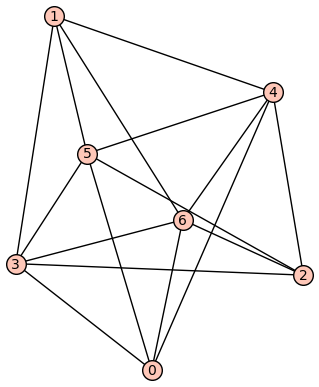

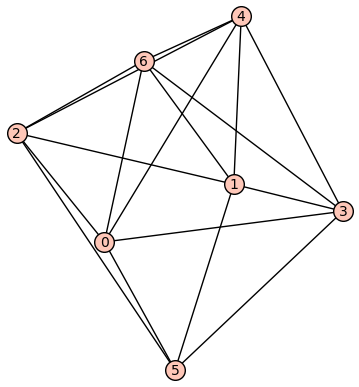

In [9]:
max_st(7)

In [10]:
#Koda seveda ne izpisuje grafov, za katere ne obstaja SDCTD dominacijsko število
def min_st(n):
    i = n
    vsi_grafi = [G for G in graphs.nauty_geng(f"{i} -c")] #vsi grafi na n vozliščih
    
    seznam = [] #za SDCTD števila
    ustrezni_grafi = []  # za grafe
    
    for g in vsi_grafi:
        stevilo = SDCTD_stevilo2(g)
        
        if stevilo is not None:
            seznam.append(stevilo)
            ustrezni_grafi.append(g)
    
    if not ustrezni_grafi:
        print("Ne obstajajo grafi s SDCTD številom")
        return None  
    
    # min SDCTD število
    min_vrednost = min(seznam)
    
    # Vsi taki grafi
    min_grafi = [ustrezni_grafi[i] for i in range(len(ustrezni_grafi)) if seznam[i] == min_vrednost]
    
    print(f"Grafi z min SDCTD številom ({min_vrednost}):")
    for g in min_grafi:
        g.show()


Grafi z min SDCTD številom (2):


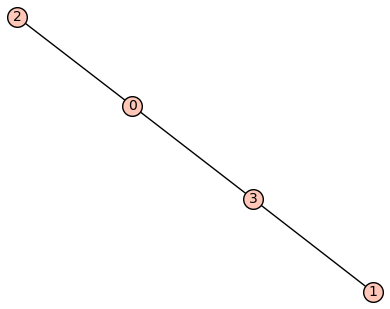

In [10]:
min_st(4)

In [2]:
def min_random(n):
    # Ustvari popoln graf z n vozlišči
    G = graphs.RandomGNP(n, 0.5)
    min_stevilo = SDCTD_stevilo2(G)  # Začetno SDCTD število

    # Funkcija za naključno spremembo povezave
    def spremenipovezavo(G):
        # Pridobi obstoječe povezave in manjkajoče povezave
        edges = G.edges(labels=False)
        non_edges = [(u, v) for u in G.vertices() for v in G.vertices() if u < v and not G.has_edge(u, v)]

        # Kopiraj graf za spremembo
        H = G.copy()

        # Naključno dodaj ali odstrani povezavo
        if edges and non_edges:
            if choice([True, False]):  # 50% verjetnost za odstranitev
                edge_to_remove = choice(edges)
                H.delete_edge(edge_to_remove)
            else:  # 50% verjetnost za dodajanje
                edge_to_add = choice(non_edges)
                H.add_edge(edge_to_add)
        elif edges:
            edge_to_remove = choice(edges)
            H.delete_edge(edge_to_remove)
        elif non_edges:
            edge_to_add = choice(non_edges)
            H.add_edge(edge_to_add)

        return H

    # dolocimo stevilo iteracij za spreminjanje povezav
    for i in range(3000):
        H = spremenipovezavo(G)  # Spremeni graf
        current_stevilo = SDCTD_stevilo2(H)  # Izračunaj SDCTD število za H
        if H.is_connected(): #ce ni povezan ga sploh ne obravnavamo ker bo to spremenilo potek algoritma
            if current_stevilo is not None and current_stevilo < min_stevilo:
                min_stevilo = current_stevilo  # Posodobi minimalno SDCTD število

        G = H  # Nadomesti graf G z grafom H
    return min_stevilo


In [16]:
min_random(10)

2

In [15]:
for i in range(3):
    print(min_random(12))




3


KeyboardInterrupt: 

In [3]:
from random import choice

def max_random(n):
    # Ustvari naključni graf z n vozlišči in gostoto povezav 0.5
    G = graphs.RandomGNP(n, 0.5)
    
    # Začetno SDCTD število
    max_stevilo = SDCTD_stevilo2(G)

    # Funkcija za naključno spremembo povezave
    def spremenipovezavo(G):
        # Pridobi obstoječe povezave in manjkajoče povezave
        edges = G.edges(labels=False)
        non_edges = [(u, v) for u in G.vertices() for v in G.vertices() if u < v and not G.has_edge(u, v)]

        # Kopiraj graf za spremembo
        H = G.copy()

        # Naključno dodaj ali odstrani povezavo
        if edges and non_edges:
            if choice([True, False]):  # 50% verjetnost za odstranitev
                edge_to_remove = choice(edges)
                H.delete_edge(edge_to_remove)
            else:  # 50% verjetnost za dodajanje
                edge_to_add = choice(non_edges)
                H.add_edge(edge_to_add)
        elif edges:
            edge_to_remove = choice(edges)
            H.delete_edge(edge_to_remove)
        elif non_edges:
            edge_to_add = choice(non_edges)
            H.add_edge(edge_to_add)

        return H

    # 500 iteracij za spreminjanje povezav
    for i in range(20000):
        H = spremenipovezavo(G)  # Spremeni graf
        current_stevilo = SDCTD_stevilo2(H)  # Izračunaj SDCTD število za H
        
        # Preveri, če je SDCTD število veljavno in večje
        if H.is_connected():
            if current_stevilo is not None and current_stevilo > max_stevilo:
                max_stevilo = current_stevilo  # Posodobi maksimalno SDCTD število
                graf_prikaz = H
            G = H  # Nadomesti graf G z grafom H
    prikaz  = G
    prikaz.show()
    return max_stevilo


In [0]:
for i in range(3):
    print(max_random(9))


Grafi z max SDCTD številom (6):


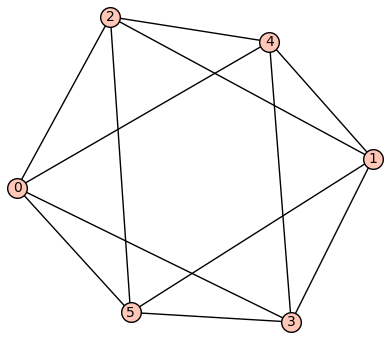

In [15]:
max_st(6)

In [4]:
#5.točka
#za majhne grafe

def vsota(g):
    h = g.complement()
    if SDCTD_stevilo2(g) is not None and SDCTD_stevilo2(h) is not None:
        return SDCTD_stevilo2(g) + SDCTD_stevilo2(h)
    return None

def SDCTD_vsota(n):
    i = n
    vsi_grafi = [G for G in graphs.nauty_geng(f"{i} -c")]
    
    seznam_vsot = []  # seznam s SDCTD števili
    ustrezni_grafi = []  # seznam z grafi

    for g in vsi_grafi:
        stevilo = None  # Inicializacija spremenljivke
        h = g.complement()
        if SDCTD_stevilo2(h) is not None:
            stevilo = vsota(g)
        
            if stevilo is not None:
                seznam_vsot.append(stevilo)
                ustrezni_grafi.append(g)
    
    if not ustrezni_grafi:
        print("Ne obstajajo grafi s SDCTD številom")
        return None  

    max_vsota = max(seznam_vsot)
    min_vsota = min(seznam_vsot)

    max_vsota_grafi = [ustrezni_grafi[i] for i in range(len(ustrezni_grafi)) if seznam_vsot[i] == max_vsota]
    min_vsota_grafi = [ustrezni_grafi[i] for i in range(len(ustrezni_grafi)) if seznam_vsot[i] == min_vsota]
    
    print(f"Grafi z max vsoto SDCTD števil ({max_vsota}):")
    #for g in max_vsota_grafi:
    #    g.show()
    #    g.complement().show()
    
    print(f"Grafi z min vsoto SDCTD števil ({min_vsota}):")
    #for g in min_vsota_grafi:
    #    g.show()
    #    g.complement().show()

    

In [5]:
SDCTD_vsota(4)

Grafi z max vsoto SDCTD števil (6):
Grafi z min vsoto SDCTD števil (4):


In [10]:
def vsota(g):
    h = g.complement()
    if SDCTD_stevilo2(g) is not None and SDCTD_stevilo2(h) is not None:
        return SDCTD_stevilo2(g) + SDCTD_stevilo2(h)
    return None

def SDCTD_vsota_random(n):
    # Ustvari naključni graf z n vozlišči in gostoto povezav 0.5
    G = graphs.RandomGNP(n, 0.5)
    
    # Začetno SDCTD število
    max_vsota_stevilo = vsota(G)
    graf_prikaz = G if max_vsota_stevilo is not None else None

    # Funkcija za naključno spremembo povezave
    def spremenipovezavo(G):
        # Pridobi obstoječe povezave in manjkajoče povezave
        edges = G.edges(labels=False)
        non_edges = [(u, v) for u in G.vertices() for v in G.vertices() if u < v and not G.has_edge(u, v)]

        # Kopiraj graf za spremembo
        H = G.copy()

        # Naključno dodaj ali odstrani povezavo
        if edges and non_edges:
            if choice([True, False]):  # 50% verjetnost za odstranitev
                edge_to_remove = choice(edges)
                H.delete_edge(edge_to_remove)
            else:  # 50% verjetnost za dodajanje
                edge_to_add = choice(non_edges)
                H.add_edge(edge_to_add)
        elif edges:
            edge_to_remove = choice(edges)
            H.delete_edge(edge_to_remove)
        elif non_edges:
            edge_to_add = choice(non_edges)
            H.add_edge(edge_to_add)

        return H

    # stevilo iteracij za spreminjanje povezav
    for i in range(10000):
        H = spremenipovezavo(G)  # Spremeni graf
        current_stevilo = vsota(H)  # Izračunaj SDCTD število za H
        
        # Preveri, če je SDCTD število veljavno in večje
        if H.is_connected() and current_stevilo is not None:
            if current_stevilo > max_vsota_stevilo:
                max_vsota_stevilo = current_stevilo  # Posodobi maksimalno SDCTD število
                graf_prikaz = H
            G = H  # Nadomesti graf G z grafom H

    #if graf_prikaz is not None:
    #    graf_prikaz.show()
    #else:
    #    print("Ni bilo mogoče najti veljavnega grafa.")
    
    return max_vsota_stevilo



In [6]:
def SDCTD_min_random(n):
    # Ustvari naključni graf z n vozlišči in gostoto povezav 0.5
    G = graphs.RandomGNP(n, 0.5)
    
    # Začetno SDCTD število
    min_vsota_stevilo = vsota(G)
    graf_prikaz = G if min_vsota_stevilo is not None else None

    # Funkcija za naključno spremembo povezave
    def spremenipovezavo(G):
        # Pridobi obstoječe povezave in manjkajoče povezave
        edges = G.edges(labels=False)
        non_edges = [(u, v) for u in G.vertices() for v in G.vertices() if u < v and not G.has_edge(u, v)]

        # Kopiraj graf za spremembo
        H = G.copy()

        # Naključno dodaj ali odstrani povezavo
        if edges and non_edges:
            if choice([True, False]):  # 50% verjetnost za odstranitev
                edge_to_remove = choice(edges)
                H.delete_edge(edge_to_remove)
            else:  # 50% verjetnost za dodajanje
                edge_to_add = choice(non_edges)
                H.add_edge(edge_to_add)
        elif edges:
            edge_to_remove = choice(edges)
            H.delete_edge(edge_to_remove)
        elif non_edges:
            edge_to_add = choice(non_edges)
            H.add_edge(edge_to_add)

        return H

    # stevilo iteracij za spreminjanje povezav
    for i in range(5000):
        H = spremenipovezavo(G)  # Spremeni graf
        current_stevilo = vsota(H)  # Izračunaj SDCTD število za H
        
        # Preveri, če je SDCTD število veljavno in manjše
        if H.is_connected() and current_stevilo is not None:
            if current_stevilo < min_vsota_stevilo:
                min_vsota_stevilo = current_stevilo  # Posodobi najmanjše SDCTD število
                graf_prikaz = H
            G = H  # Nadomesti graf G z grafom H

   # if graf_prikaz is not None:
   #     graf_prikaz.show()
   # else:
   #     print("Ni bilo mogoče najti veljavnega grafa.")
    
    return min_vsota_stevilo


In [9]:
i = 15
for j in range(20):
    print(SDCTD_vsota_random(i))


7


7


7


KeyboardInterrupt: 

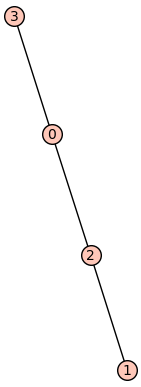

4

In [47]:
SDCTD_min_random(4)